# Data Exploration

## Objectives
1. Visualizing data
1. Computing summary statistics
1. Aggregating data via pivot tables
2. Combining multiple tables on shared attributes

# Load Data Using Pandas

Pandas is a Python library (set of functions somebody else wrote) for doing data analysis. 

https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [1]:
import pandas as pd #import is how we load libraries
pd.__version__

'0.24.1'

In [4]:
# ../data/abuse.csv is where I store the file - change to your location
# file is stored in df variable
df = pd.read_csv("../data/abuse.csv")

In [5]:
df.head()

,characteristic,Male-%,Male-S.E.,Male-estimate,Female-%,Female-S.E.,Female-estimate,Total-%,Total-S.E.,Total-estimate,race-ethnicity
0,Total,6.93,0.28,6906,2.55,0.16,2762,4.65,0.18,9668,Total
1,18–29,9.35,0.61,2110,4.57,0.39,1041,6.95,0.39,3151,Total
2,30–44,8.69,0.49,2742,3.31,0.28,1080,5.95,0.31,3822,Total
3,45–64,5.50,0.43,1719,1.70,0.20,566,3.54,0.25,2286,Total
4,65+,2.36,0.32,335,0.38,0.11,75,1.21,0.15,410,Total


In [7]:
df['characteristic'].dtype

dtype('O')

In [8]:
# lets' treat this as text data: 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html
df['characteristic'].str

In [12]:
# tell me if this measurement in this column is equal to total
df['characteristic'].str.match("Total")
# use head to sho first 5
df['characteristic'].str.match("Total").head()


0     True
1    False
2    False
3    False
4    False
Name: characteristic, dtype: bool

In [15]:
# Let's remove any accurance of total to avoid double counts
# | - or , either cell in row has total
total_rows = (df['characteristic'].str.match("Total") |
              df['race-ethnicity'].str.match("Total"))
total_rows.head()

0    True
1    True
2    True
3    True
4    True
dtype: bool

In [16]:
# Let's remove any accurance of total to avoid double counts
# ~ is negation, total_rows: row is True when Total is present
dfc = df[~total_rows]

In [17]:
dfc.head()

,characteristic,Male-%,Male-S.E.,Male-estimate,Female-%,Female-S.E.,Female-estimate,Total-%,Total-S.E.,Total-estimate,race-ethnicity
6,18–29,10.19,0.81,1405,5.56,0.54,777,7.86,0.50,2182,White
7,30–44,10.10,0.63,2166,4.13,0.38,902,7.09,0.40,3068,White
8,45–64,5.97,0.51,1425,2.02,0.26,499,3.96,0.30,1925,White
9,65+,2.38,0.35,279,0.36,0.10,58,1.21,0.16,336,White
11,18–29,6.92,1.28,166,2.10,0.45,68,4.28,0.67,254,Black


# How many people do we have total of each race?
1. `groupby` - aggregate
2. `sum` - reduce
3. More info: https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html

In [23]:
ragg = dfc.groupby('race-ethnicity')
# All rows in first group
list(ragg)[0]

('Asian(c)',
    characteristic  Male-%  Male-S.E.  Male-estimate  Female-%  Female-S.E.  \
 21          18–29    4.77       1.81             63      3.89         1.38   
 22          30–44    4.22       1.54             64      0.23         0.22   
 23          45–64    1.13       0.78             13      0.20         0.20   
 24            65+    0.00       0.00              0      0.00         0.00   
 
     Female-estimate  Total-%  Total-S.E.  Total-estimate race-ethnicity  
 21               47     4.35        1.25             110       Asian(c)  
 22                4     2.18        0.79              68       Asian(c)  
 23                3     0.61        0.32              16       Asian(c)  
 24                0     0.00        0.00               0       Asian(c)  )

In [25]:
# sums all the rows in a group
rsum = ragg.sum()
rsum

,Male-%,Male-S.E.,Male-estimate,Female-%,Female-S.E.,Female-estimate,Total-%,Total-S.E.,Total-estimate
race-ethnicity,,,,,,,,,
Asian(c),10.12,4.13,140,4.32,1.80,54,7.14,2.36,194
Black,20.23,3.56,555,4.98,1.24,182,11.67,1.78,755
Hispanic/Latino,22.00,4.12,759,5.13,1.32,194,13.50,2.05,954
Native American(b),31.36,13.29,157,17.32,10.35,97,23.90,9.01,254
White,28.64,2.30,5275,12.07,1.28,2236,20.12,1.36,7511


## Can we visualize that?

## Let's talk pictures in Python
There are many visualization libraries, but we will primarily use [matplotlib](https://matplotlib.org/index.html). We can use matplotlib directly or through Pandas.

![annotated figure with matplotlib terms for each aspect](figs/L06/anatomy_mpl.png)


In [28]:
rsum.index

Index(['Asian(c)', 'Black', 'Hispanic/Latino', 'Native American(b)', 'White'], dtype='object', name='race-ethnicity')

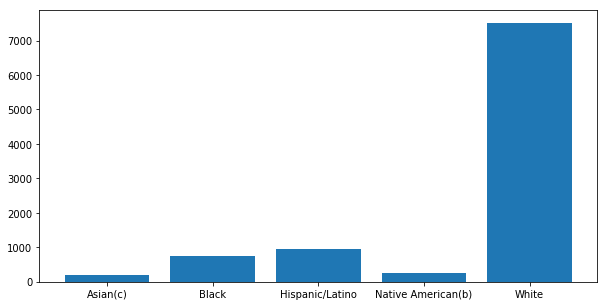

In [31]:
%matplotlib inline 

import matplotlib.pyplot as plt

#create an image, make it pretty wide: figsize=(width, height)
fig, ax = plt.subplots(figsize=(10,5)) 
# using matplotlib's bar function (directly, ax.bar(x values, heights)
_ = ax.bar(rsum.index, rsum['Total-estimate'])
#_ suppresses output

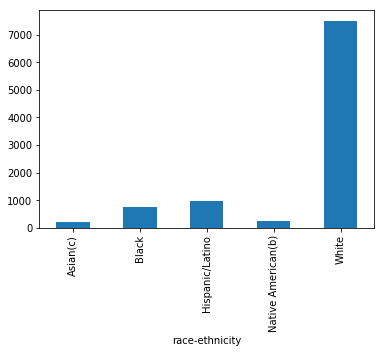

In [33]:
# Alternatively, we can use a Pandas wrapper on matplotlib to generate a bar
# Pandas-quicker, Matplotlib-more customization
_ = rsum['Total-estimate'].plot.bar()

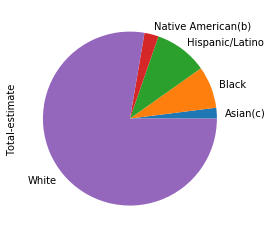

In [34]:
_ = rsum['Total-estimate'].plot.pie()

# Practice: Get aggregates by characteristic (age)
1. Total
2. Male
3. Female
4.

# Can we see characteristic by race?

In [35]:
table = df.pivot(index='characteristic', columns='race-ethnicity', 
                    values=['Male-%', 'Female-%', 'Total-%'])


In [36]:
table

Male-%                                                        \
race-ethnicity Asian(c) Black Hispanic/Latino Native American(b) Total  White   
characteristic                                                                  
18–29              4.77  6.92            9.08              15.25  9.35  10.19   
30–44              4.22  7.04            4.88               7.67  8.69  10.10   
45–64              1.13  4.48            4.35               4.85  5.50   5.97   
65+                0.00  1.79            3.69               3.59  2.36   2.38   
Total              3.20  5.71            6.21               7.47  6.93   7.45   

               Female-%                                                       \
race-ethnicity Asian(c) Black Hispanic/Latino Native American(b) Total White   
characteristic                                                                 
18–29              3.89  2.10            3.04               6.68  4.57  5.56   
30–44              0.23  1.51            1.46               6.52  3.31  4.13   
45–64              0.20  1.25            0.63               0.00  1.70  2.02   
65+                0.00  0.12            0.00               4.12  0.38  0.36   
Total              1.13  1.41            1.65               4.18  2.55  2.92   

                Total-%                                                       
race-ethnicity Asian(c) Black Hispanic/Latino Native American(b) Total White  
characteristic                                                                
18–29              4.35  4.28            6.28              10.35  6.95  7.86  
30–44              2.18  3.95            3.23               7.07  5.95  7.09  
45–64              0.61  2.66            2.43               2.57  3.54  3.96  
65+                0.00  0.78            1.56               3.91  1.21  1.21  
Total              2.13  3.29            3.97               5.75  4.65  5.10

In [ ]:
_ = table['Male-%'].plot.bar()

In [ ]:
# clean it up a bit using stacked bar plots
_ = table['Male-%'].plot.bar(stacked=True)

In [ ]:
# Switch the grouping by flipping the table
table['Male-%'].T

In [ ]:
_ = table['Male-%'].T.plot.bar(stacked=True)

# Practice:
1. See how women differ
2. Try a different column set

# Let's do some math!

In [ ]:
# Let's use columwise summation (axis=1) to confirm that the male and female estimates sum to the total
dfc[['Male-estimate', 'Female-estimate']].sum(axis=1)

In [ ]:
#let's see where it's off a bit
dfc[~(dfc[['Male-estimate', 'Female-estimate']].sum(axis=1) == dfc['Total-estimate'])]

In [ ]:
# mean per column:
dfc.mean()

In [ ]:
# full summary stats
dfc.describe()

In [ ]:
# Standard deviation
dfc.groupby(['race-ethnicity']).std()

In [ ]:
# What if we want the mean for each race-ethnicity?
estimates = dfc.groupby(['race-ethnicity'])[['Male-estimate', 'Female-estimate', 'Total-estimate']].sum()

In [ ]:
estimates

In [ ]:
# remove total so we're not double counting on the visualization
est_sex = estimates[['Male-estimate', 'Female-estimate']]
_ = est_sex.plot.bar(stacked=True)

In [ ]:
#pictures need lots of polishing, this is just exploratory
_ = est_sex.plot.pie(subplots=True, figsize=(10,5))

In [ ]:
_ = est_sex.T.plot.bar(stacked=True)

In [ ]:
# let's look at gender, which means removing totals
_ = est_sex.T['White'].plot.pie()

# Practice
Try plotting a different race-ethnicity

In [ ]:
# Let's use a boxplot to visualize the different groupings
# using the seaborn visualization library to provide stats graphs
import seaborn as sns
sns.boxplot(x = 'race-ethnicity', y = 'Male-estimate', data=dfc)

# Practice 
Get the mean for each demographic/characteristic (aggregate over race)

# How do we join two datasets?
![table merge where 1st row is scanned and on match with element in second row, new row is created with elements of both](figs/L06/merge.gif)

Source [Randy Au, Can we stop with the SQL JOINs venn diagrams insanity?](https://towardsdatascience.com/can-we-stop-with-the-sql-joins-venn-diagrams-insanity-16791d9250c3?sk=f8bfa36658362ee6d54951681967a45b)


In [ ]:
df2 = pd.read_csv("../data/dependency.csv")

In [ ]:
df2.head()

In [ ]:
# need both characteristic and race-ethnicty for row uniquiness
pd.merge(df, df2, on=['characteristic', 'race-ethnicity'])

In [ ]:
#lets use better identifiers than x, y
data = pd.merge(df, df2, on=['characteristic', 'race-ethnicity'], suffixes=('-abuse', '-dependency'))

In [ ]:
data.head()

In [ ]:
# let's get just estimate data
ecol = [est for est in data.columns if 'estimate' in est]
ecol

In [ ]:
estdf = data[['characteristic', 'race-ethnicity']+ecol]

In [ ]:
estdf.head()

# Practice
1. For each race/demo/sex, find if the abuse or dependency is higher, and the difference between the two
2. Visualize the difference